In [1]:
import os, torch
# from PIL import Image
from kolors.pipelines.pipeline_stable_diffusion_xl_chatglm_256 import StableDiffusionXLPipeline
from kolors.models.modeling_chatglm import ChatGLMModel
from kolors.models.tokenization_chatglm import ChatGLMTokenizer
from diffusers import UNet2DConditionModel, AutoencoderKL
from diffusers import EulerDiscreteScheduler
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

/home/bc-user/.conda/envs/kolors/lib/python3.10/site-packages/diffusers/schedulers/scheduling_lms_discrete.py:21: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy import integrate


In [2]:
ckpt_dir = f'./weights/Kolors'
text_encoder = ChatGLMModel.from_pretrained(
    f'{ckpt_dir}/text_encoder',
    torch_dtype=torch.float16).half()
tokenizer = ChatGLMTokenizer.from_pretrained(f'{ckpt_dir}/text_encoder')
vae = AutoencoderKL.from_pretrained(f"{ckpt_dir}/vae", revision=None).half()
scheduler = EulerDiscreteScheduler.from_pretrained(f"{ckpt_dir}/scheduler")
unet = UNet2DConditionModel.from_pretrained(f"{ckpt_dir}/unet", revision=None).half()

pipe = StableDiffusionXLPipeline(
        vae=vae,
        text_encoder=text_encoder,
        tokenizer=tokenizer,
        unet=unet,
        scheduler=scheduler,
        force_zeros_for_empty_prompt=False)

pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

/home/bc-user/.conda/envs/kolors/lib/python3.10/site-packages/diffusers/loaders/lora_pipeline.py:2251: FutureWarning: `LoraLoaderMixin` is deprecated and will be removed in version 1.0.0. LoraLoaderMixin is deprecated and this will be removed in a future version. Please use `StableDiffusionLoraLoaderMixin`, instead.
  deprecate("LoraLoaderMixin", "1.0.0", deprecation_message)


  0%|          | 0/50 [00:00<?, ?it/s]

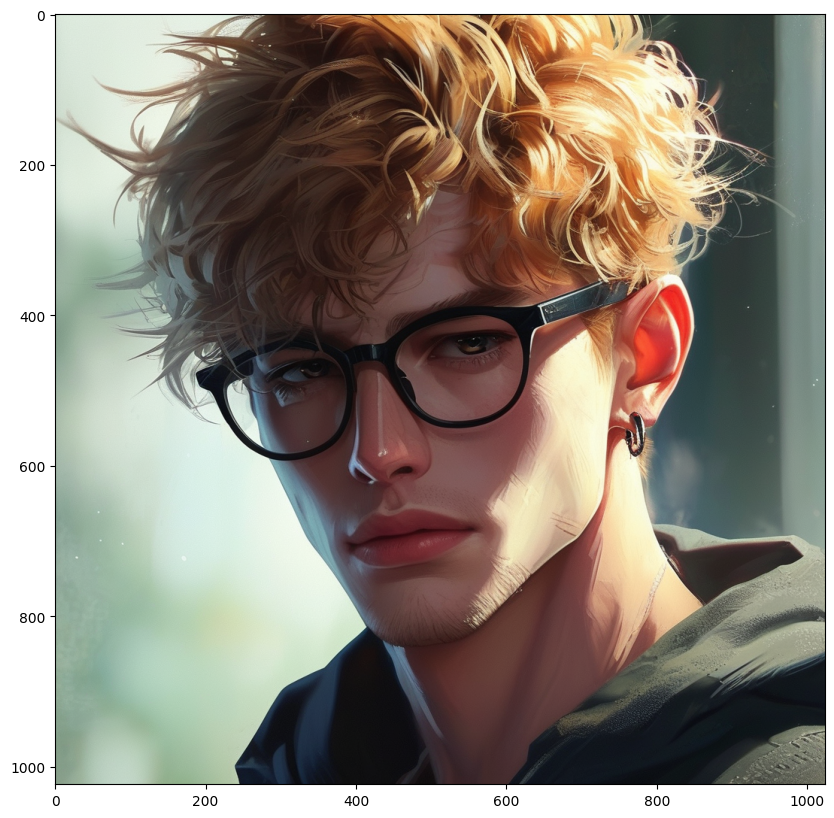

In [3]:
prompt = "webtoon character"

seed = 0

image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    num_inference_steps=50,
    guidance_scale=5.0,
    num_images_per_prompt=1,
    generator=torch.Generator(pipe.device).manual_seed(seed) 
).images[0]

plt.figure(figsize=(10, 10)) 
plt.imshow(image)

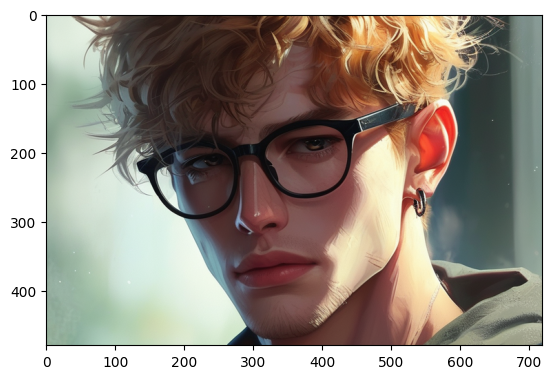

In [4]:
output_size = (720, 480)
image_resized = ImageOps.fit(image, output_size, method=Image.LANCZOS)

plt.imshow(image_resized)
image_resized.save('image.png', format='PNG')
